# Lab 2 : Classification

## G3 SDI - Machine Learning

In this lab, we will tackle a binary classification problem. We are going to use the MNIST dataset, which contains 28x28 images of handwritten digits. More precisely, our goal will be to distinguish between 3s and 5s using logistic regression and K-nearest neighbors.

### Instructions
* Rename your notebook with your surnames as `lab2_Name1_Name2.ipynb`, and include your names in the notebook.
* Your code, and its output, must be commented !
* Please upload your notebook on Moodle in the dedicated section before the deadline.

<div style="background-color: rgba(255, 255, 0, 0.15); padding: 8px;">
Report written by AMORRI Farah, MILANO Olivia, 15/10/2025.
</div>

In [49]:
# Import usual libraries
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from matplotlib import pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

**Q1.** Load the data from the `.npy` files included in the archive (use `np.load`). How many examples are there ? How many features ? What do the values of the features represent ?

In [4]:
data3 = np.load("data3.npy")
data5 = np.load("data5.npy")


print(f"Number of '3' examples: {data3.shape[0]}")
print(f"Number of '5' examples: {data5.shape[0]}")

print("\n")
print(f"Number of features for '3': {data3.shape[1]}")
print(f"Number of features for '5': {data5.shape[1]}")

print(f"Features example: {data3[0]}")

Number of '3' examples: 1037
Number of '5' examples: 963


Number of features for '3': 784
Number of features for '5': 784
Features example: [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   2  93 219 254 255 146  20   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  93 163 253
 253 253 253 253 241   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0  98 250 253 253 241 200 164 253

<div style="background-color: rgba(255, 255, 0, 0.15); padding: 8px;">
<strong>Observations: </strong>


- Class 3 contains <strong>1,037 examples</strong>, 

- Class 5 contains <strong>963 examples</strong>, 

For a total of <strong>2,000 examples</strong>.

Each example is described by <strong>783 features</strong>, corresponding to the grayscale intensity 
of each image pixel, with values ranging from <strong>0 to 256</strong>.
</div>


**Q2.** Display a few examples of 3, and a few examples of 5 (use `plt.imshow`). Comment.

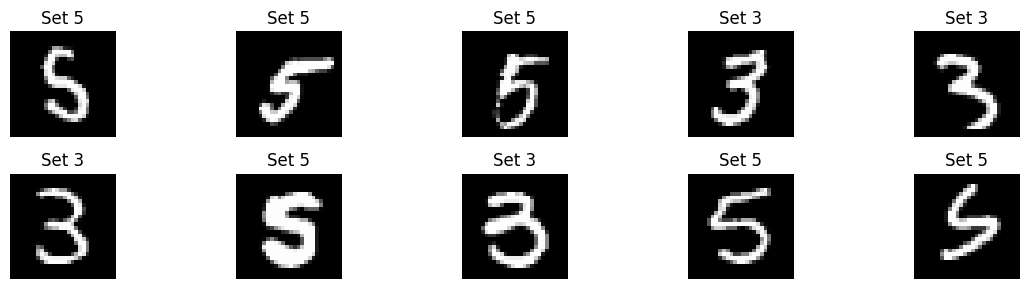

In [18]:
data3 = np.array(data3)
data5 = np.array(data5)
res3 = int(np.sqrt(data3.shape[1]))
res5 = int(np.sqrt(data3.shape[1]))
img_features3 = data3.reshape(data3.shape[0], res3, res3)
img_features5 = data5.reshape(data5.shape[0], res5, res5)
img_features = {
    3: img_features3,
    5: img_features5
}

fig, axes = plt.subplots(2, 5, figsize=(12, 3))


for ax in axes.flat:
    choice = np.random.choice([3, 5])
    idx = np.random.randint(0, img_features[choice].shape[0])
    image = img_features[choice][idx]
    
    # Display the image
    ax.imshow(image, cmap='gray')
    ax.set_title(f"Set {choice}")
    ax.axis('off')

plt.tight_layout()
plt.show()

<div style="background-color: rgba(255, 255, 0, 0.15); padding: 8px;">

The digits are not all identical. 

While the human eye can usually distinguish a 3 from a 5, 
some images are ambiguous and may cause confusion. 


As a result, we can expect these 
particular images to be more difficult for a classification model to identify correctly.
</div>


**Q3.** Create a variable X which contains all the images (use `np.vstack`), and a variable y which encodes the class.

Normalize the features between 0 and 1.

In [31]:
X = np.vstack((data3,data5))
labels_3 = np.zeros(data3.shape[0], dtype=int)
labels_5 = np.ones(data5.shape[0], dtype=int)

y = np.concatenate((labels_3, labels_5))

print(X.shape)
print(y.shape)


scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X)

(2000, 784)
(2000,)


**Q4.** Split the dataset into a training set and a test set, using 20% of the original dataset for the test set. Do not forget to set the random state.

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=42)
print(X_train.shape)
print(X_test.shape)

(1600, 784)
(400, 784)


**Q5.** Train a logistic regression model on the training set (see documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)). Recall how the coefficients are obtained.

What does scikit-learn do by default that does not match what we studied during the lecture ?

In [33]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=42, max_iter=1000).fit(X_train, y_train)

<div style="background-color: rgba(255, 255, 0, 0.15); padding: 8px;">
The model is defined as P(y=1 | x, w) = σ(w₀ + Σ wⱼxⱼ) = σ(wᵀx), with w = {w₀, w₁, …, wₚ}.  

When we fit the logistic regression model, we estimate **the parameters w by maximizing the likelihood.**  

The objective function we minimize is the negative log-likelihood:  

ŵ = − Σ [ yᵢ log(σ(wᵀxᵢ)) + (1 − yᵢ) log(1 − σ(wᵀxᵢ)) ]  

The numerical optimization of this function is performed using gradient-based methods (such as gradient descent or quasi-Newton algorithms).  

However, by default, scikit-learn’s <code>LogisticRegression</code> includes **L2 regularization**, which means it minimizes a *regularized* version of the loss function.  
This differs from the unregularized logistic regression studied during the lecture, where only the log-likelihood term is considered.
</div>


**Q6.** Compute the accuracy on the test set.

In [36]:
accuracy = clf.score(X_test, y_test)
y_pred = clf.predict(X_test)

print(f"Accuracy on the test set: {accuracy}")

Accuracy on the test set: 0.955


**Q7.** Display the confusion matrix from the test set (add label names), and interpret it.

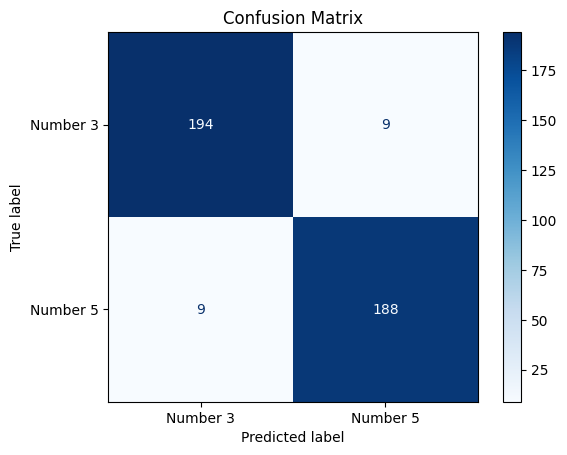

In [38]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["Number 3","Number 5"])  # optional
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

<div style="background-color: rgba(255, 255, 0, 0.15); padding: 8px;">
The confusion matrix shows that the model performs very well in distinguishing between the digits 3 and 5.  

- <strong>194</strong> images of number 3 are correctly classified as 3.  
- <strong>188</strong> images of number 5 are correctly classified as 5.  
- <strong>9</strong> images of number 3 are misclassified as 5, and <strong>9</strong> images of number 5 are misclassified as 3.  

The accuracy is <strong>95.5%</strong>.  
The small number of errors indicates that the model is effective, though some images of 3 and 5 are visually similar and may cause confusion which explains the few misclassifications observed.
</div>


**Q8.** Display an example where a 3 was mistaken for 5, and vice versa. Comment.

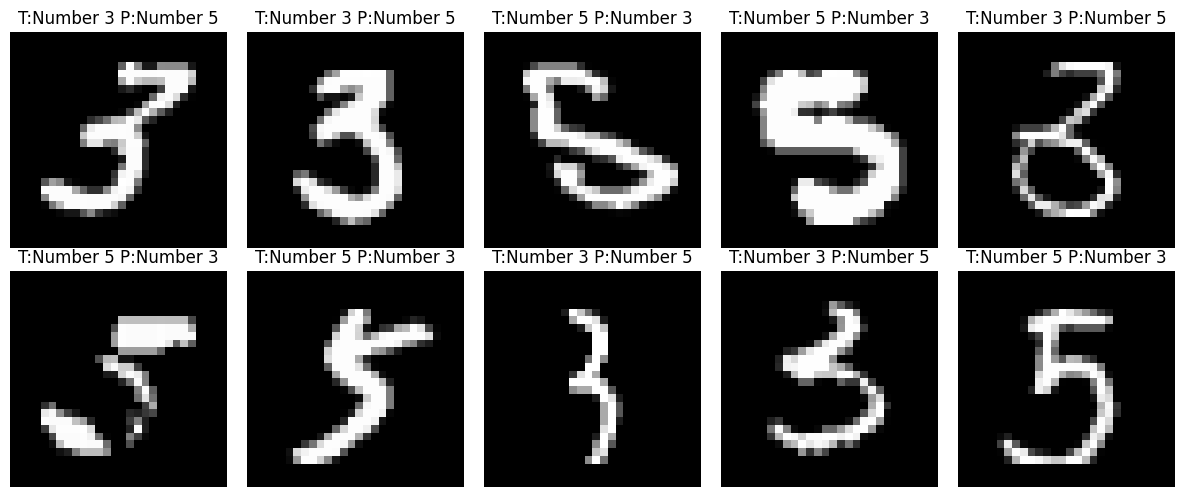

In [40]:
mask = [y_pred[i] != y_test[i] for i in range(len(y_test))]

mistakes = X_test[mask]
mistake_labels = y_test[mask]
pred_labels = y_pred[mask]

num_images = 10
res = int(np.sqrt(X_test.shape[1]))
label_dict = {
    0: "Number 3",
    1: "Number 5"
}

# Crée la figure 2x5
fig, axes = plt.subplots(2, 5, figsize=(12, 5))

for i, ax in enumerate(axes.flat):
    if i < len(mistakes):
        image = mistakes[i].reshape(res, res)  # reshape si nécessaire
        ax.imshow(image, cmap='gray')
        ax.set_title(f"T:{label_dict[mistake_labels[i]]} P:{label_dict[pred_labels[i]]}")
    ax.axis('off')

plt.tight_layout()
plt.show()

<div style="background-color: rgba(255, 255, 0, 0.15); padding: 8px;">
These images represent the <strong>misclassified examples</strong> from the logistic regression model.  
We can see that the confusion between the digits 3 and 5 often comes from their <strong>similar handwritten shapes</strong>:

- Some 3’s are written with a closed upper or lower loop, making them resemble a 5.  
- Some 5’s are written with a rounded bottom or a narrow upper part, making them look like a 3.  
- A few digits are <strong>poorly centered</strong> or <strong>partially drawn</strong>, which reduces the contrast between the two classes.  
- The variations in <strong>stroke thickness and pixel intensity</strong> also make classification harder for a linear model such as logistic regression.  

Overall, these examples illustrate that the model’s errors are mainly due to <strong>ambiguous handwriting</strong> rather than fundamental model weakness.
</div>


**Q9.** As we have seen during the lecture, the logistic regression model does not directly output a 0 or a 1, but rather the probability of being 0 or 1 (given x), which can be accessed with the `.predict_proba` attribute. This probability is then compared to a threshold to output the prediction, the default threshold being 0.5.

Recall what is the underlying assumption of using a threshold of 0.5.

Display the evolution of the precision and recall (using the 5s as the reference class), as well as the F1-score, when the threshold varies between 0 and 1. Comment.

In [47]:
thresholds = np.linspace(0, 1, 101)
precisions, recalls, f1s = [], [], []


probas = clf.predict_proba(X_test)  
probas_5 = probas[:,1]
print(probas_5.shape)

for t in thresholds:
    y_pred_thresh = (probas_5 >= t).astype(int)  # 1 if prob >= t, 0 else
    y_true = (y_test == 1).astype(int) # label of 5 is 1

    precisions.append(precision_score(y_true, y_pred_thresh, zero_division=0))
    recalls.append(recall_score(y_true, y_pred_thresh, zero_division=0))
    f1s.append(f1_score(y_true, y_pred_thresh, zero_division=0))

(400,)


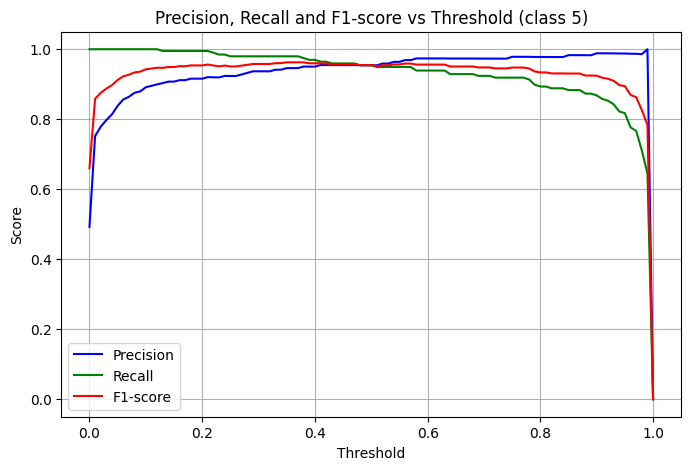

In [48]:
plt.figure(figsize=(8, 5))
plt.plot(thresholds, precisions, label='Precision', color='blue')
plt.plot(thresholds, recalls, label='Recall', color='green')
plt.plot(thresholds, f1s, label='F1-score', color='red')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision, Recall and F1-score vs Threshold (class 5)')
plt.legend()
plt.grid(True)
plt.show()

<div style="background-color: rgba(255, 255, 0, 0.15); padding: 8px;">
The threshold of <strong>0.5</strong> assumes that the model’s classes are <strong>equally likely</strong> and that the <strong>costs of false positives and false negatives are the same</strong>.  
In other words, we predict class 5 when P(y=5|x) ≥ 0.5, assuming a balanced trade-off between the two types of errors.

When we vary the threshold between 0 and 1, we can observe the following behavior:

- For <strong>low thresholds</strong> (close to 0), almost all images are classified as 5.  
  -> <strong>high recall</strong> (most true 5s are detected) but a <strong>low precision</strong> (many 3s are incorrectly predicted as 5).  

- As the <strong>threshold increases</strong>, precision improves because fewer 3s are misclassified as 5, but recall decreases since more true 5s are missed.  

- The <strong>F1-score</strong> (red curve) combines both effects and reaches its maximum around the point where precision and recall are balanced — typically near the default threshold of 0.5 in this case.

Overall, this plot illustrates the classic <strong>trade-off between precision and recall</strong> when adjusting the decision threshold, and confirms that the logistic regression model maintains strong performance for a wide range of thresholds.
</div>


**Q10.** Lastly, we would like to check the performance of KNN on this dataset. To do so, select the optimal value of $K$ by cross-validation on the training set, and then compute the accuracy score of the optimal KNN on the test set. Comment.

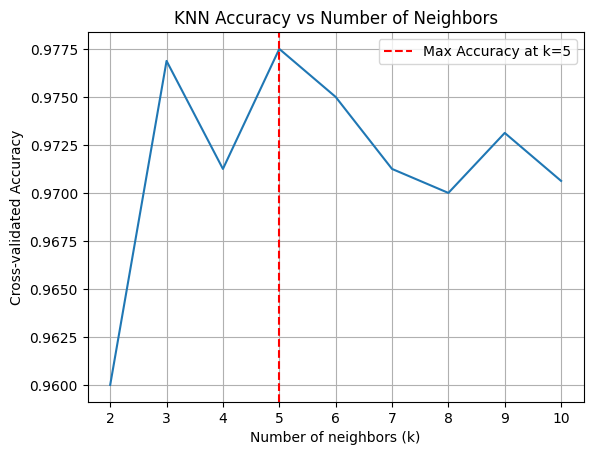

In [71]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

K = [k for k in range(2,11)]
cross_validation_acc = []
for k in K:
    neigh = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    # y_pred = neigh.predict(X_train)
    # accuracy = accuracy_score(y_train, y_pred)
    scores = cross_val_score(neigh, X_train, y_train, cv=5, scoring='accuracy')
    cross_validation_acc.append(scores.mean())

best_k = K[np.argmax(cross_validation_acc)]

plt.plot(K, cross_validation_acc)
plt.xlabel("Number of neighbors (k)")
plt.ylabel("Cross-validated Accuracy")
plt.title("KNN Accuracy vs Number of Neighbors")
plt.xticks(K)
plt.axvline(x=best_k, color='red', linestyle='--', label=f'Max Accuracy at k={best_k}')
plt.grid(True)
plt.legend()
plt.show()




In [72]:
K = 5
neigh = KNeighborsClassifier(n_neighbors=K).fit(X_train, y_train)
y_pred = neigh.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy on the test set: {accuracy}")

Accuracy on the test set: 0.985


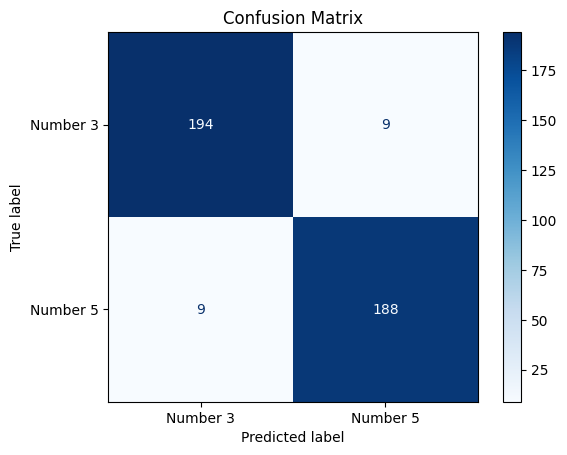

In [73]:
cm_final = confusion_matrix(y_test, y_pred)
disp_f = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["Number 3","Number 5"])  # optional
disp_f.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

<div style="background-color: rgba(255, 255, 0, 0.15); padding: 8px;">
The cross-validation results show that the <strong>optimal number of neighbors</strong> for the KNN classifier is <strong>k = 5</strong>, as it yields the highest average accuracy (around <strong>97.8%</strong>) on the training folds.  
This suggests that using five neighbors provides the best trade-off between underfitting (too few neighbors) and overfitting (too many neighbors).

When evaluated on the test set with this optimal k, the <strong>confusion matrix</strong> confirms that the model performs very well:
- <strong>194</strong> images of the digit 3 are correctly classified.
- <strong>188</strong> images of the digit 5 are correctly classified.
- Only <strong>9</strong> instances of each digit are misclassified as the other.

The test accuracy is of <strong>95.5%</strong>, very similar to the logistic regression model.  
The remaining errors can be attributed to ambiguous handwriting, where the digits 3 and 5 share similar shapes.  
Overall, the KNN with k = 5 achieves strong and stable performance on this dataset.
</div>
